# Simulation for additional results (Variou $T$'s)

* This notebook contains the codes for simulations that evaluates the effect of the length of time window in DAA.
* You can view and download this notebook at my [github repo](https://github.com/okuchap/DAA_Lucas). (https://github.com/okuchap/DAA_Lucas)
* See also other notebooks about simulation

In [1]:
%matplotlib inline
%load_ext autoreload
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pathlib
import time
from datetime import datetime
import scipy.optimize as opt
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
#plt.style.use("ggplot")
mpl.pyplot.rcParams['figure.figsize'] = (5.0, 4.0)
plt.rcParams["font.size"] = 13
#mpl.rcParams["font.family"] = 'Osaka'

import sys
sys.path.append('../code/')

from simulation_additional import *
from simulation_fixed_path import make_stats

In [6]:
# data for pre-simulation period
path = '../data/BTCdata_presim.csv'
df = pd.read_csv(path)
df['time'] = pd.to_datetime(df['time'])
df = df.rename(columns={'blocktime': 'block_times', 'price': 'prices', 'probability of success /Eh': 'winning_rates'})
df.head()

### Simulation

In [24]:
T_list = [1,10,50,100,500,1000]

print('Start: {}'.format(datetime.now()))

for T in T_list:
    generate_simulation_data(num_iter=5000, prev_data=prev_data, T=T)
    print('T={} is done: {}'.format(T, datetime.now()))

Start: 2021-11-07 19:25:22.542451
T=1 is done: 2021-11-07 19:33:56.997746
T=10 is done: 2021-11-08 04:35:33.569705
T=50 is done: 2021-11-08 13:18:36.527476
T=100 is done: 2021-11-08 23:51:08.785655
T=500 is done: 2021-11-09 08:10:11.842522
T=1000 is done: 2021-11-09 20:32:01.665800


### Block time statistics

In [3]:
dir_sim = '/Volumes/Data/research/BDA/simulation/'
filelist = [dir_sim+'DAA-1_blocktime_ps0_5000obs_T=1.csv',
            dir_sim+'DAA-1_blocktime_ps0_5000obs_T=10.csv',
            dir_sim+'DAA-1_blocktime_ps0_5000obs_T=50.csv',
            dir_sim+'DAA-1_blocktime_ps0_5000obs_T=100.csv',
            dir_sim+'DAA-1_blocktime_ps0_5000obs_T=500.csv',
            dir_sim+'DAA-1_blocktime_ps0_5000obs_T=1000.csv',
            dir_sim+'DAA-2_blocktime_ps0_5000obs_T=1.csv',
            dir_sim+'DAA-2_blocktime_ps0_5000obs_T=10.csv',
            dir_sim+'DAA-2_blocktime_ps0_5000obs_T=50.csv',
            dir_sim+'DAA-2_blocktime_ps0_5000obs_T=100.csv',
            dir_sim+'DAA-2_blocktime_ps0_5000obs_T=500.csv',
            dir_sim+'DAA-2_blocktime_ps0_5000obs_T=1000.csv',
            ]
df_stats = make_stats(filelist=filelist, dir_sim=dir_sim)

In [4]:
df_stats

,DAA-1_blocktime_ps0_5000obs_T=1.csv,DAA-1_blocktime_ps0_5000obs_T=10.csv,DAA-1_blocktime_ps0_5000obs_T=50.csv,DAA-1_blocktime_ps0_5000obs_T=100.csv,DAA-1_blocktime_ps0_5000obs_T=500.csv,DAA-1_blocktime_ps0_5000obs_T=1000.csv,DAA-2_blocktime_ps0_5000obs_T=1.csv,DAA-2_blocktime_ps0_5000obs_T=10.csv,DAA-2_blocktime_ps0_5000obs_T=50.csv,DAA-2_blocktime_ps0_5000obs_T=100.csv,DAA-2_blocktime_ps0_5000obs_T=500.csv,DAA-2_blocktime_ps0_5000obs_T=1000.csv
mean,21859.597948,32.786073,18.872199,17.602932,14.806173,14.756136,21859.597948,11.835513,10.074432,10.041372,10.041386,10.056569
std,74762.272771,102.848884,35.421379,30.700983,23.862425,22.857462,74762.272771,33.750421,10.670332,10.313296,10.117893,10.132803
over60,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
over120,1.000000,1.000000,0.999400,0.991400,0.889800,0.902200,1.000000,1.000000,0.626800,0.261400,0.110800,0.114400
over180,1.000000,1.000000,0.983400,0.920200,0.726000,0.684000,1.000000,1.000000,0.048200,0.004400,0.000400,0.000800


### MSE for different $T$'s

Compute the sum of squeared error for each path $p_n$ $(n = 0, \dots, 4999)$
$$
e_n := \sum_t [w(t) - w^*(t)]^2
$$
and compute
$$
\frac{1}{5000} \sum_{n} e_n
$$
(MSE for a path)

In [4]:
T_list = [1,10,50,100,500,1000]

In [7]:
dir_sim = '/Volumes/Data/research/BDA/simulation/'
res_DAA1 = []
res_DAA2 = []

for T in T_list:
    df_daa2_winrate = pd.read_csv(dir_sim + 'DAA-2_winrate_ps0_5000obs_T={}.csv'.format(T), index_col=0)
    df_daa2_optwinrate = pd.read_csv(dir_sim + 'DAA-2_optwinrate_ps0_5000obs_T={}.csv'.format(T), index_col=0)
    error_DAA2 = MSE(df1=df_daa2_winrate, df2=df_daa2_optwinrate)
    res_DAA2.append(error_DAA2)
    
    df_daa1_winrate = pd.read_csv(dir_sim + 'DAA-1_winrate_ps0_5000obs_T={}.csv'.format(T), index_col=0)
    df_daa1_optwinrate = pd.read_csv(dir_sim + 'DAA-1_optwinrate_ps0_5000obs_T={}.csv'.format(T), index_col=0)
    error_DAA1 = MSE(df1=df_daa1_winrate, df2=df_daa1_optwinrate)
    res_DAA1.append(error_DAA1)

In [13]:
mse_daa1 = np.array(res_DAA1)
mse_daa2 = np.array(res_DAA2)
Ts = np.array(T_list)

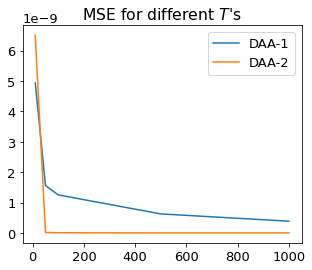

In [19]:
plt.plot(Ts[1:], res_DAA1[1:], label='DAA-1')
plt.plot(Ts[1:], res_DAA2[1:], label='DAA-2')
plt.title('MSE for different $T$\'s ')
plt.legend()
plt.show()